In [2]:
import numpy as np
import spacy
import pandas as pd

import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file

from collections import Counter

In [3]:
nlp = spacy.load('en')

In [4]:
#spacy preprocess text
ai_raw = open("input/ai_awakening.txt").read()
#load sentences using gensim
sentences = gensim.models.word2vec.LineSentence("input/ai_awakening.txt")

In [5]:
#parse raw data using spacy
ai = nlp(ai_raw)


In [6]:
#create model using gensim sentences
new_model = gensim.models.Word2Vec(sentences, size=50, window=5, min_count=2, iter=20)
len(new_model.wv.vocab)

1450

In [7]:
new_model.most_similar('people')

[('there', 0.9997653961181641),
 ('things', 0.9997628331184387),
 ('Dean', 0.9997603893280029),
 ('even', 0.9997450113296509),
 ('something', 0.9997383952140808),
 ('them', 0.9997336864471436),
 ('an', 0.9997313022613525),
 ('like', 0.999728798866272),
 ('Google’s', 0.9997256398200989),
 ('on', 0.9997251629829407)]

In [8]:
#remove stop words, and isolate words that are in model vocabulary
ai_ = [w for w in ai if w.is_stop == False ] 
data = Counter([w.string.strip() for w in ai_]).most_common(len(ai_))
data = [item[0] for item in data]

data = [item for item in new_model.wv.vocab if item in data]

len(data)



854

In [9]:
#change into 2 dimensions and visualize using TSNE
tsne = TSNE(n_components=2, random_state=0)
words_ai_tsne = tsne.fit_transform(new_model[data])

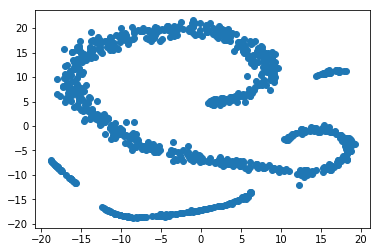

In [10]:
#this plots all words, not very informative


plt.scatter(words_ai_tsne[:, 0], words_ai_tsne[:, 1])
plt.show()


In [129]:
#using bokeh, adds labels

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=words_ai_tsne[:,0],
                                    x2=words_ai_tsne[:,1],
                                    names=data))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)